<a href="https://colab.research.google.com/github/eduardokern/ML/blob/dm/notebooks/dimensionality-reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redução de dimensionalidade

Seguindo o exemplo do algoritmo de binarização apresentado em nossa última aula, realize a implementação em Python para transformar uma imagem colorida para níveis de cinza (0 a 255) e para binarizada (0 e 255), preto e branco.  

Por meio da imagem é possível visualizar os dois casos esperados:

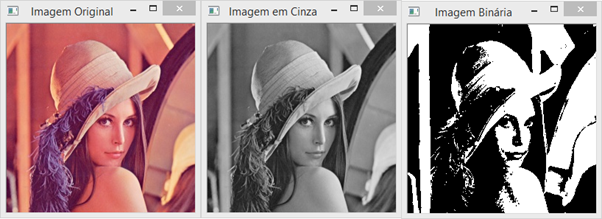

Figura 1: Lena colorida (imagem de entrada), em níveis de cinza e preto e branca.

Original image


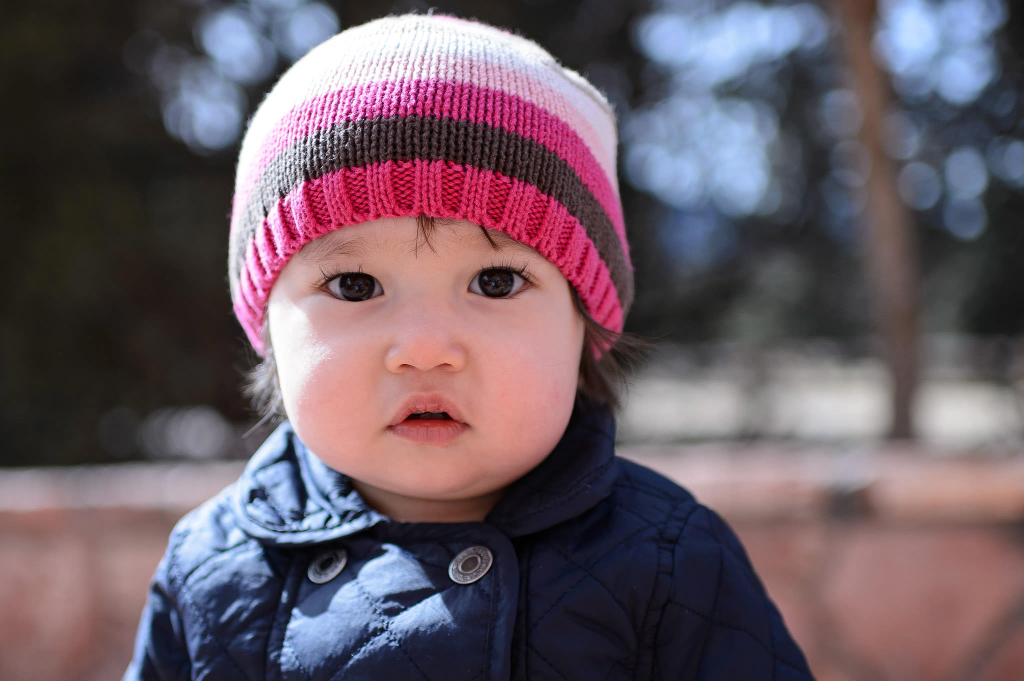


Grayscale image


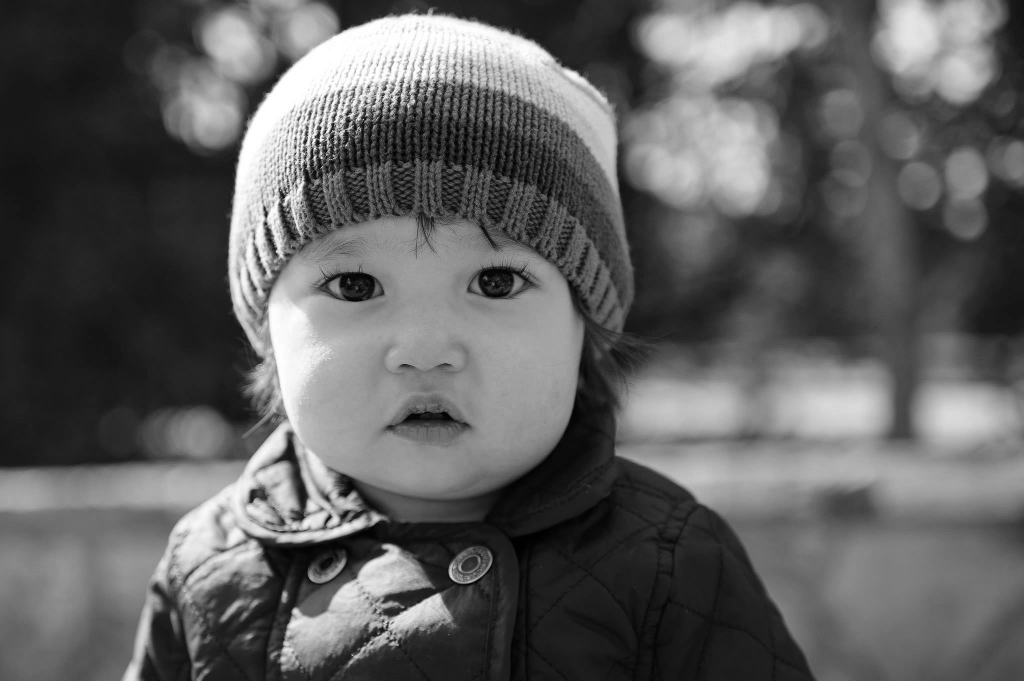


Binary image with a threshold of 100


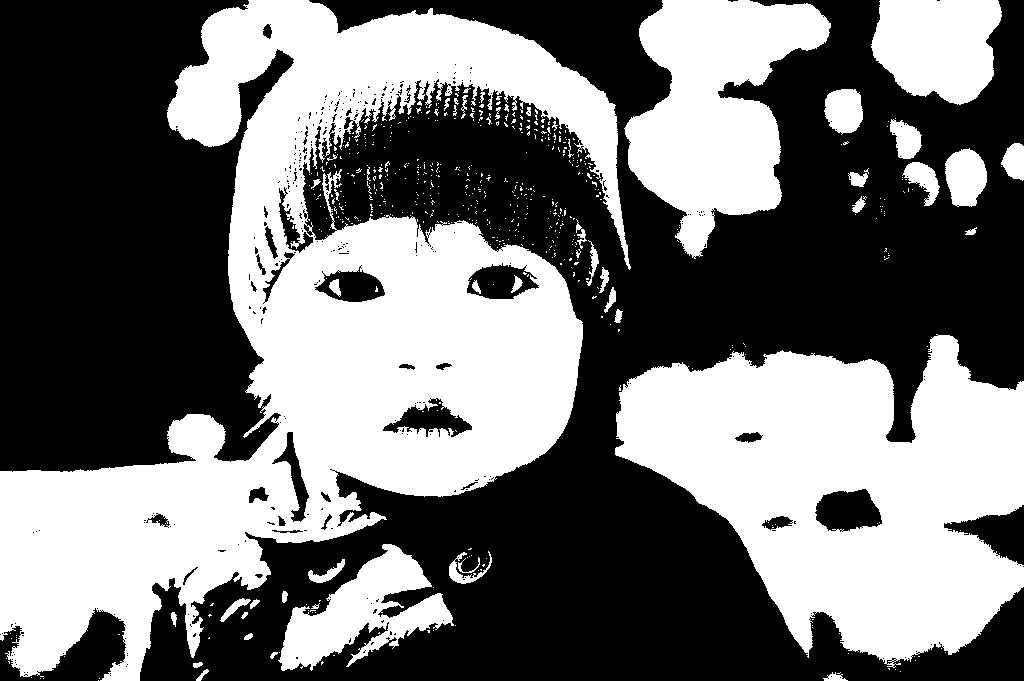


Binary image with a threshold of 160


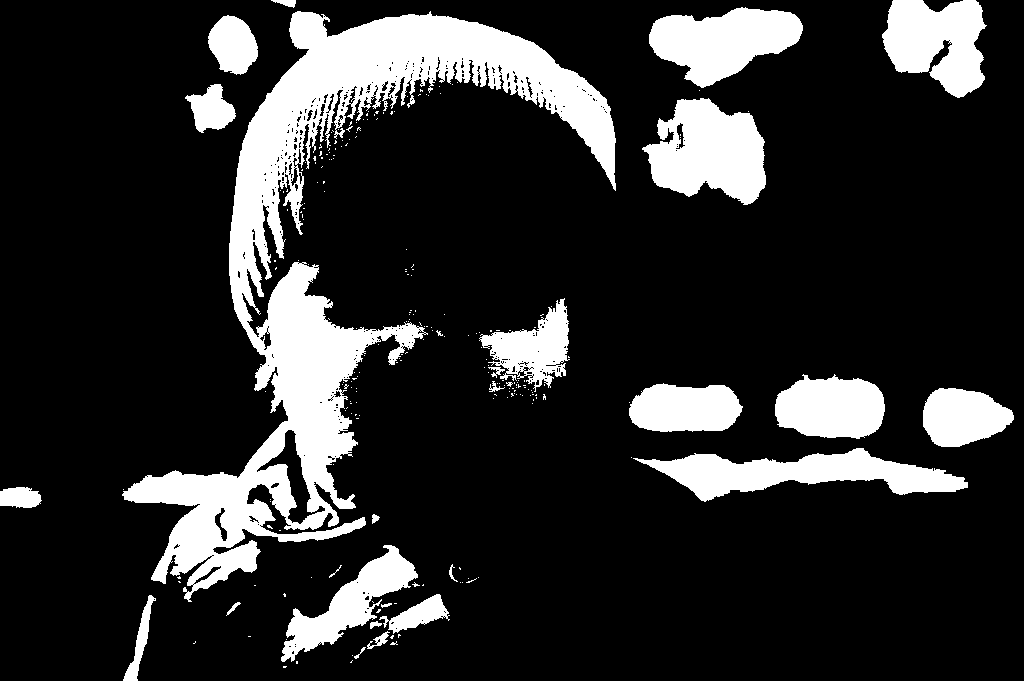

In [36]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


def convert_to_gray(image):
  """ Convert an RGB image to a grayscale image using the weighted average of
      the sum of R, G and B values
  """
  red_weight = 0.299
  green_weight = 0.587
  blue_weight = 0.114

  gray_image = np.zeros((height, width, 1), np.uint8)
  for i in range(height):
    for j in range(width):
      gray_image[i][j] = image[i][j][0]*red_weight \
        + image[i][j][1]*green_weight \
        + image[i][j][2]*blue_weight

  return gray_image


def binarization(image, threshold):
  """ Convert an grayscale image to a binary image using the give threshold to
      determine when a pixel should be 0 or 255
  """
  bin_image = np.zeros((height, width, 1), np.uint8)
  for i in range(height):
    for j in range(width):
      bin_image[i][j] = 0 if gray_image[i][j][0] < threshold else 255

  return bin_image


# Load image
# image = cv2.imread('/content/sample_data/sample1.jpg')
# image = cv2.imread('/content/sample_data/sample2.jfif')
image = cv2.imread('/content/sample_data/sample3.jpg')

# Resize it to half the size, just for better visualize image in Colab
shape = image.shape
height = shape[0]//2
width = shape[1]//2
image = cv2.resize(image, (width, height))

print('Original image')
cv2_imshow(image)
print()

# Convert the sample image to grayscale
gray_image = convert_to_gray(image)
print('Grayscale image')
cv2_imshow(gray_image)
print()

# Convert the grayscale image to a binary
threshold = 100
bin_image = binarization(gray_image, threshold)
print(f'Binary image with a threshold of {threshold}')
cv2_imshow(bin_image)
print()

threshold = 160
bin_image = binarization(gray_image, threshold)
print(f'Binary image with a threshold of {threshold}')
cv2_imshow(bin_image)
